<a href="https://colab.research.google.com/github/Sahil786-cybe/Sales-Performance-Analysis-Forecasting-for-a-Global-Superstore.ipynb/blob/main/Sales_Performance_Analysis_%26_Forecasting_for_a_Global_Superstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")
sns.set(style='whitegrid')

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_excel("Global_Superstore_Synthetic.xlsx")


Saving Global_Superstore_Synthetic.xlsx to Global_Superstore_Synthetic.xlsx


In [ ]:
# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Sort by date
df = df.sort_values('Order Date')

# Check for null values
df.isnull().sum()


,0
Order Date,0
Region,0
Category,0
Sub-Category,0
Sales,0
Quantity,0
Discount,0
Profit,0


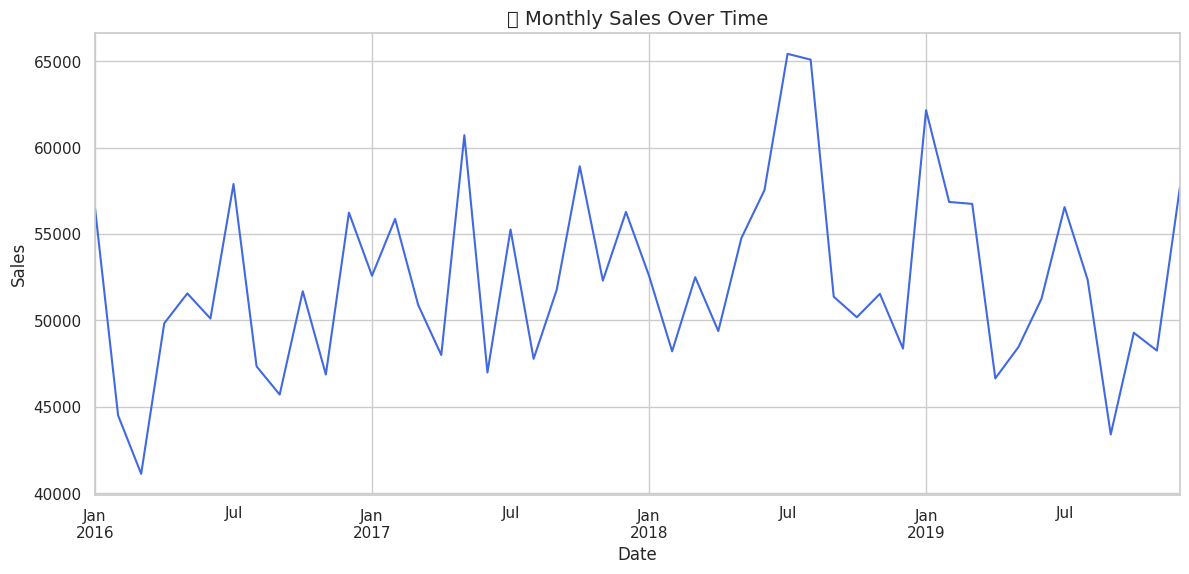

In [ ]:
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()

plt.figure(figsize=(14,6))
monthly_sales.plot(color='royalblue')
plt.title("📈 Monthly Sales Over Time", fontsize=14)
plt.ylabel("Sales")
plt.xlabel("Date")
plt.grid(True)
plt.show()


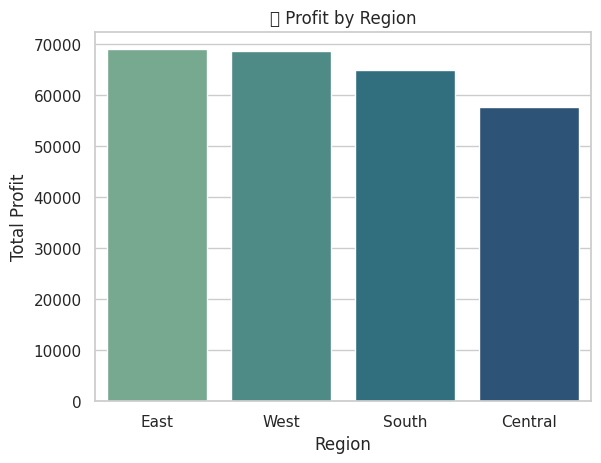

In [ ]:
region_profit = df.groupby("Region")["Profit"].sum().sort_values(ascending=False)
sns.barplot(x=region_profit.index, y=region_profit.values, palette='crest')
plt.title("💰 Profit by Region")
plt.ylabel("Total Profit")
plt.show()


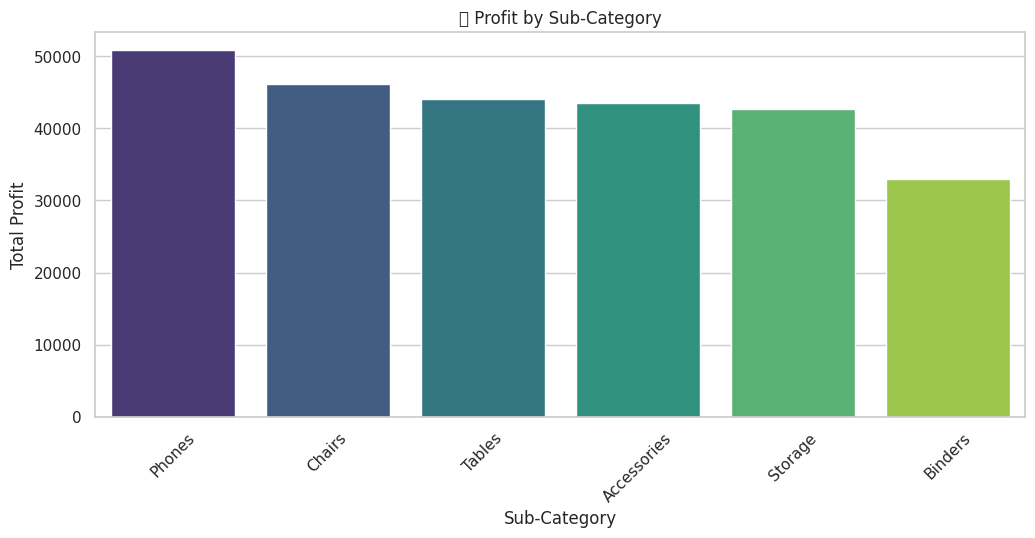

In [ ]:
subcat_profit = df.groupby("Sub-Category")["Profit"].sum().sort_values(ascending=False)
plt.figure(figsize=(12,5))
sns.barplot(x=subcat_profit.index, y=subcat_profit.values, palette='viridis')
plt.xticks(rotation=45)
plt.title("📦 Profit by Sub-Category")
plt.ylabel("Total Profit")
plt.show()


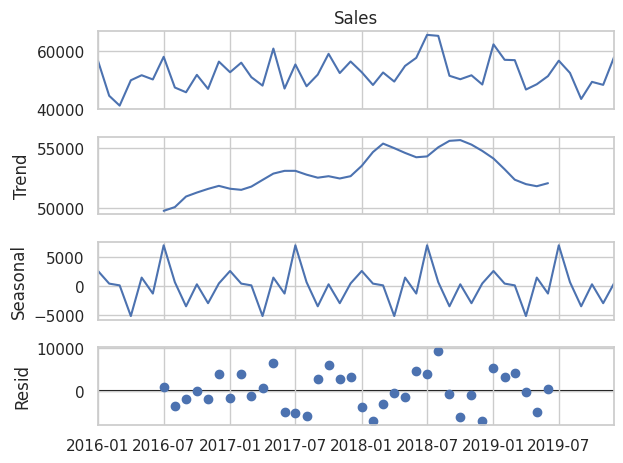

In [ ]:
decomposition = seasonal_decompose(monthly_sales, model='additive')
decomposition.plot()
plt.show()


In [ ]:
train = monthly_sales[:-6]
test = monthly_sales[-6:]


In [ ]:
model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit()


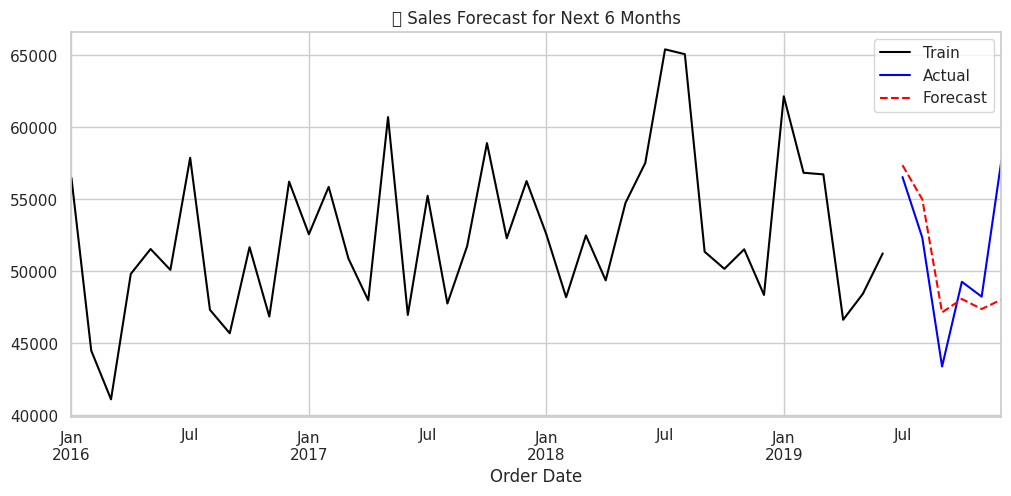

In [ ]:
forecast = results.get_forecast(steps=6)
preds = forecast.predicted_mean

# Plot forecast
plt.figure(figsize=(12,5))
train.plot(label='Train', color='black')
test.plot(label='Actual', color='blue')
preds.plot(label='Forecast', color='red', linestyle='--')
plt.title("🔮 Sales Forecast for Next 6 Months")
plt.legend()
plt.grid(True)
plt.show()
